In [4]:
import json
import os
import shutil
import subprocess
import tempfile
# metadata ='/home/joaquin/projects/methylation/test.json'

metadata = '/home/joaquin/projects/methylation/data/commonData/ids_data_allReplicates_methylation.json'
basePathDataFolder = '/home/joaquin/projects/methylation/data'
narrowPeakLocationFolders = ['tfs_rep_1','tfs_rep_3_input_from_rep_2', 'tfs_rep_2', 'tfs_rep_4']
specificPathsSumary = {}
# Opening JSON file
with open(metadata) as jsonMetadata:
     experimentsClasification = json.load(jsonMetadata)['experiments']

# parse the experiments file to get the id of each exeriment and the path to that experiment
for experiment in experimentsClasification:
    print(experiment['condition'])
    specificPathsSumary[experiment['condition']] = {}
    for metState in ['direct', 'amplified']:
        specificPathsSumary[experiment['condition']][metState] = []
        for replicate, number in zip(
            experiment[metState],
            ['replicate1','replicate2', 'replicate3']
        ):
            expeId, expPath = replicate[number][0]['sample'].strip().split(',')
    # if it is a missing experiment dont continue with the analisys
            if 'MISSING' in expeId:
                print(number, expPath, expeId)
                continue
            for possiblenarrowPeakFolder in narrowPeakLocationFolders:
                narrowPeakFolder = None
                path = os.path.join(basePathDataFolder,possiblenarrowPeakFolder,expPath)
    # make a list of the files in each posible directory. Try and continue if the experiment was not 
    # done for the replicate. 
                try:
                    filesInFolder = os.listdir(path)
                except FileNotFoundError:
                    continue
    # search for the specific experiment id inside the folder in the names to check if it is the correct folder
    # and stop searching if it is inside

                for file in filesInFolder:
                    if 'html' in file:
                        fileid=file
#                 print(fileid)
#                 print(expeId)
                if fileid.startswith(expeId):
                    narrowPeakFolder = possiblenarrowPeakFolder
                    break
    
            narrowpeakFileOriginalPath = os.path.join(
                basePathDataFolder,narrowPeakFolder,expPath,'GEMout','GEMout.GEM_events.narrowPeak'
            )
#             specificPathsSumary[experiment['condition']][metState].append((narrowPeakFolder,narrowpeakFileOriginalPath))
            specificPathsSumary[experiment['condition']][metState].append(narrowpeakFileOriginalPath)
            
#             print(narrowPeakFolder,expPath)
#             narrowpeakFileDestinationPath = os.path.join(
#                 basePathDataFolder,'AllNarrowPeaksMets',experiment['condition']+'_'+metState+'_'+number+'.narrowPeak'
#             )
#             shutil.copy(narrowpeakFileOriginalPath,narrowpeakFileDestinationPath)



MYC31Mock
MYC31JA
MYC31ACC
MYC36Mock
replicate3 MYC3/amplified/6/Mock MISSING
MYC36JA
MYC36ACC
MYC324Mock
MYC324JA
MYC324ACC
MYCH71Mock
MYCH71JA
MYCH71ACC
MYCH76Mock
MYCH76JA
MYCH76ACC
MYCH724Mock
replicate2 MYCH7/direct/24/Mock MISSING
MYCH724JA
MYCH724ACC


In [5]:
import itertools

summaryFolder = 'allDataNarrowPeaksmin2repSixCoincidence'
for experimentCondition in specificPathsSumary:
    print(experimentCondition)
    for metstate in specificPathsSumary[experimentCondition]:
        print(metstate)
        commonPeaksthreeReplicates = set()
        
        for subset in itertools.combinations(specificPathsSumary[experimentCondition][metstate], 2):
            endProcess = subprocess.run(
                'bedtools intersect -wb -wa -a {} -b {} -f 0.6 -r'.format(subset[0], subset[1]),
                shell=True,
                capture_output=True
            )
            # first check if the subcommand has the standar err empty, whith mean it has run correct.
            if endProcess.stderr.decode('ascii') == '':
                # if it is correct then split the lines in two parts(the firs and second file matchs) and finally split
                # in individual coordinates
                # lastly generate a set, this way only will save non repeated values 
                
                stdoutLines = endProcess.stdout.decode('ascii').replace('\tchr', '\nchr').split('\n')[:-1]
                for line in stdoutLines:
                    commonPeaksthreeReplicates.add(line)
            else:
                print('there is an error related with bedtools')

        narrowpeakFileDestinationPath = os.path.join(
                basePathDataFolder,summaryFolder,experimentCondition+'_'+ metstate+'_replicates_common_Peaks_min_2_reps.narrowPeak'
            )
        print(len(commonPeaksthreeReplicates))
        with open(narrowpeakFileDestinationPath,'w') as mergePeaksFile:
            
            for line in commonPeaksthreeReplicates:
                mergePeaksFile.write(line+'\n')



MYC31Mock
direct
56417
amplified
30739
MYC31JA
direct
50591
amplified
45483
MYC31ACC
direct
52386
amplified
36948
MYC36Mock
direct
38868
amplified
14535
MYC36JA
direct
37583
amplified
29051
MYC36ACC
direct
43839
amplified
32352
MYC324Mock
direct
53482
amplified
29362
MYC324JA
direct
34866
amplified
43589
MYC324ACC
direct
38095
amplified
35922
MYCH71Mock
direct
16097
amplified
18498
MYCH71JA
direct
22945
amplified
23686
MYCH71ACC
direct
11786
amplified
14968
MYCH76Mock
direct
8692
amplified
25959
MYCH76JA
direct
14088
amplified
21558
MYCH76ACC
direct
14384
amplified
31259
MYCH724Mock
direct
15793
amplified
17461
MYCH724JA
direct
28024
amplified
11225
MYCH724ACC
direct
21059
amplified
8169


In [ ]:
# development

In [64]:
commonPeaksthreeReplicates = set()
endProcess = subprocess.run(
                'bedtools intersect -wb -wa -a /home/joaquin/projects/methylation/scripts/developenJupyters/testfile1.txt -b /home/joaquin/projects/methylation/scripts/developenJupyters/testfile2.txt  -f 0.6 -r',
                shell=True,
                capture_output=True
            )
            # first check if the subcommand has the standar err empty, whith mean it has run correct.
if endProcess.stderr.decode('ascii') == '':
    # if it is correct then split the lines in two parts(the firs and second file matchs) and finally split
    # in individual coordinates
    # lastly generate a set, this way only will save non repeated values 

    stdoutLines = endProcess.stdout.decode('ascii').replace('\tchr', '\nchr').split('\n')[:-1]
    for line in stdoutLines:
        commonPeaksthreeReplicates.add(line)
with open('hoallalal.txt','w') as mergePeaksFile:

    for line in commonPeaksthreeReplicates:
        mergePeaksFile.write(line+'\n')

In [74]:
import json
import os
import shutil
import subprocess
import tempfile
# metadata ='/home/joaquin/projects/methylation/test.json'

metadata = '/home/joaquin/projects/methylation/data/commonData/ids_data_allReplicates_methylation.json'
basePathDataFolder = '/home/joaquin/projects/methylation/data'
narrowPeakLocationFolders = ['tfs_rep_1','tfs_rep_3_input_from_rep_2', 'tfs_rep_2', 'tfs_rep_4']
specificPathsSumary = {}
# Opening JSON file
with open(metadata) as jsonMetadata:
     experimentsClasification = json.load(jsonMetadata)['experiments']

# parse the experiments file to get the id of each exeriment and the path to that experiment
for experiment in experimentsClasification:
    print(experiment['condition'])
    specificPathsSumary[experiment['condition']] = {}
    for metState in ['direct', 'amplified']:
        specificPathsSumary[experiment['condition']][metState] = []
        narrowpeakMeanval = os.path.join(
                basePathDataFolder,'allDataNarrowPeaksmin2reps',experiment['condition']+'_'+metState+'_replicates_common_Peaks_min_2_reps.narrowPeak'
            )
        num_lines = sum(1 for line in open(narrowpeakMeanval))
        print(experiment['condition']+' '+metState+ ' summary peaks in > 2 replicates: ',num_lines)
        for replicate, number in zip(
            experiment[metState],
            ['replicate1','replicate2', 'replicate3']
        ):
            expeId, expPath = replicate[number][0]['sample'].strip().split(',')
    # if it is a missing experiment dont continue with the analisys
            if 'MISSING' in expeId:
                print(number, expPath, expeId)
                continue
            for possiblenarrowPeakFolder in narrowPeakLocationFolders:
                narrowPeakFolder = None
                path = os.path.join(basePathDataFolder,possiblenarrowPeakFolder,expPath)
    # make a list of the files in each posible directory. Try and continue if the experiment was not 
    # done for the replicate. 
                try:
                    filesInFolder = os.listdir(path)
                except FileNotFoundError:
                    continue
    # search for the specific experiment id inside the folder in the names to check if it is the correct folder
    # and stop searching if it is inside

                for file in filesInFolder:
                    if 'html' in file:
                        fileid=file
#                 print(fileid)
#                 print(expeId)
                if fileid.startswith(expeId):
                    narrowPeakFolder = possiblenarrowPeakFolder
                    break
    
            narrowpeakFileOriginalPath = os.path.join(
                basePathDataFolder,narrowPeakFolder,expPath,'GEMout','GEMout.GEM_events.narrowPeak'
            )
            num_lines = sum(1 for line in open(narrowpeakFileOriginalPath))
            print(experiment['condition']+' '+metState+' '+number, ': ',num_lines)
#             specificPathsSumary[experiment['condition']][metState].append((narrowPeakFolder,narrowpeakFileOriginalPath))
            specificPathsSumary[experiment['condition']][metState].append(narrowpeakFileOriginalPath)

            narrowpeakFileDestinationPath = os.path.join(
                basePathDataFolder,'AllNarrowPeaksMets',experiment['condition']+'_'+metState+'_'+number+'.narrowPeak'
            )
#             shutil.copy(narrowpeakFileOriginalPath,narrowpeakFileDestinationPath)



MYC31Mock
MYC31Mock direct summary peaks in > 2 replicates:  56417
MYC31Mock direct replicate1 :  27466
MYC31Mock direct replicate2 :  17205
MYC31Mock direct replicate3 :  44675
MYC31Mock amplified summary peaks in > 2 replicates:  30739
MYC31Mock amplified replicate1 :  12880
MYC31Mock amplified replicate2 :  9744
MYC31Mock amplified replicate3 :  38525
MYC31JA
MYC31JA direct summary peaks in > 2 replicates:  50591
MYC31JA direct replicate1 :  25294
MYC31JA direct replicate2 :  12318
MYC31JA direct replicate3 :  42193
MYC31JA amplified summary peaks in > 2 replicates:  45483
MYC31JA amplified replicate1 :  22501
MYC31JA amplified replicate2 :  9953
MYC31JA amplified replicate3 :  34386
MYC31ACC
MYC31ACC direct summary peaks in > 2 replicates:  52386
MYC31ACC direct replicate1 :  22668
MYC31ACC direct replicate2 :  12531
MYC31ACC direct replicate3 :  38277
MYC31ACC amplified summary peaks in > 2 replicates:  36948
MYC31ACC amplified replicate1 :  12182
MYC31ACC amplified replicate2 :  

In [7]:
import glob
basePathDataFolder = '/home/joaquin/projects/methylation/data'
dataFolder = 'allDataNarrowPeaksmin2repSixCoincidence'
folderPath = os.path.join(
                basePathDataFolder,dataFolder
            )
listOfFiles = glob.glob(folderPath+'/*')
for fileName in listOfFiles:
    print(fileName)
    endProcess = subprocess.run(
        "sort -k 1.4n,1n -k2,2n {} > temp1 && cat temp1 > {} && rm temp1".format(fileName,fileName),
        shell=True,
        capture_output=True)
    print(endProcess.stderr)
    if endProcess.stderr.decode('ascii') != '':
        print("WARNING THERE IS A PROBLEN SORTING: ", endProcess.stderr.decode('ascii'))
# !

/home/joaquin/projects/methylation/data/allDataNarrowPeaksmin2repSixCoincidence/MYC324ACC_direct_replicates_common_Peaks_min_2_reps.narrowPeak
b''
/home/joaquin/projects/methylation/data/allDataNarrowPeaksmin2repSixCoincidence/MYCH76ACC_direct_replicates_common_Peaks_min_2_reps.narrowPeak
b''
/home/joaquin/projects/methylation/data/allDataNarrowPeaksmin2repSixCoincidence/MYCH724JA_amplified_replicates_common_Peaks_min_2_reps.narrowPeak
b''
/home/joaquin/projects/methylation/data/allDataNarrowPeaksmin2repSixCoincidence/MYC31JA_direct_replicates_common_Peaks_min_2_reps.narrowPeak
b''
/home/joaquin/projects/methylation/data/allDataNarrowPeaksmin2repSixCoincidence/MYCH71JA_amplified_replicates_common_Peaks_min_2_reps.narrowPeak
b''
/home/joaquin/projects/methylation/data/allDataNarrowPeaksmin2repSixCoincidence/MYCH724JA_direct_replicates_common_Peaks_min_2_reps.narrowPeak
b''
/home/joaquin/projects/methylation/data/allDataNarrowPeaksmin2repSixCoincidence/MYC36Mock_direct_replicates_common_

MYC324ACC direct 26620
MYCH76ACC direct 11348
MYCH724JA amplified 8922
MYC31JA direct 40726
MYCH71JA amplified 19095
MYCH724JA direct 24161
MYC36Mock direct 31144
MYCH724ACC amplified 6120
MYC36ACC amplified 28662
MYCH724Mock direct 13415
MYC31Mock amplified 24945
MYC324JA amplified 33407
MYCH71Mock amplified 14504
MYCH71ACC direct 10102
MYC36ACC direct 34343
MYC324JA direct 26589
MYCH71ACC amplified 12666
MYC36JA direct 28299
MYC324ACC amplified 27020
MYCH76ACC amplified 23716
MYCH71JA direct 18096
MYC31ACC amplified 27955
MYCH76Mock amplified 21323
MYC31ACC direct 42125
MYCH724ACC direct 17610
MYC324Mock amplified 20303
MYCH76JA direct 11177
MYC36JA amplified 19747
MYCH724Mock amplified 13724
MYC31JA amplified 31062
MYC324Mock direct 45576
MYCH76Mock direct 6069
MYC36Mock amplified 10152
MYCH71Mock direct 14003
MYCH76JA amplified 16614
MYC31Mock direct 47085


<AxesSubplot:xlabel='experimentalcondition', ylabel='num_lines'>

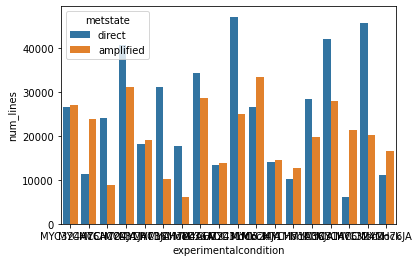

In [31]:
import seaborn 
import pandas as pd
import os
basePathDataFolder = '/home/joaquin/projects/methylation/data'
dataFolder = 'allDataNarrowPeaksmin2reps'
folderPath = os.path.join(
                basePathDataFolder,dataFolder
            )

listOfFile = []
for filePath in listOfFiles:
    
#     print(filePath.split('/')[-1])
    fileName = filePath.split('/')[-1]
    experimentalcondition, metstate = fileName.split('_')[0],fileName.split('_')[1]
    num_lines = sum(1 for line in open(filePath))
    listOfFile.append((experimentalcondition, metstate, num_lines))
    print(experimentalcondition, metstate, num_lines)
finaldf = pd.DataFrame(
    listOfFile,
    columns=["experimentalcondition", "metstate", "num_lines"],
)
    

    
seaborn.barplot(data=finaldf, x="experimentalcondition", y="num_lines", hue="metstate")

In [57]:
# TODO extract the common sequence of the regulation in each fragment.
#https://stackoverflow.com/questions/10016802/grouping-a-list-of-integers-with-nearest-values
import glob
import os
import time
from statistics import mean
basePathDataFolder = '/home/joaquin/projects/methylation/data'
dataFolder = 'allDataNarrowPeaksmin2repSixCoincidence'
folderPath = os.path.join(
                basePathDataFolder,dataFolder
            )
listOfFiles = glob.glob(folderPath+'/*')
dictOfCommonNPEvents = {}
for fileName in listOfFiles:
    #Just keep the 3erd col that contains the center coordinate and the chr, split : to separate
    #chr:coordinate, and generate a list to work with
    print(fileName)
    with open(fileName, 'r') as NPEvents:
        for line in NPEvents:
            chrAndCoor = list(map(lambda x: int(x), line.strip().split('\t')[3].split(':')))
            dictOfCommonNPEvents.setdefault(chrAndCoor[0], [])
            dictOfCommonNPEvents[chrAndCoor[0]].append(chrAndCoor[1])
    for chrm in dictOfCommonNPEvents:
        print(chrm)
        m = [[dictOfCommonNPEvents[chrm][0]]]

        for x in dictOfCommonNPEvents[chrm][1:]:
            if x - m[-1][-1] < 80:
                m[-1].append(x)
            else:
                meanValPeak = int(mean(m[-1]))
                m.pop()
                m.append([meanValPeak-100,meanValPeak+101])
                m.append([x])
                
        meanValPeak = int(mean(m[-1]))
        m.pop()
        m.append([meanValPeak-100,meanValPeak+101])
        dictOfCommonNPEvents[chrm] = m
    break

/home/joaquin/projects/methylation/data/allDataNarrowPeaksmin2repSixCoincidence/MYC324ACC_direct_replicates_common_Peaks_min_2_reps.narrowPeak
1
2
3
4
5


In [50]:
m

[[2527, 2589, 2640],
 [4283, 4290],
 [5909, 5924],
 [9411, 9465],
 [13536, 13554, 13557],
 [17159, 17169],
 [26143, 26144],
 [26239, 26255],
 [31928, 31930, 31945],
 [57762, 57763],
 [72993, 72997],
 [76503, 76504],
 [80380, 80383],
 [102229, 102230],
 [105172, 105172, 105174],
 [105269, 105271],
 [106581, 106605, 106609],
 [115202, 115203],
 [115288, 115289],
 [118580, 118582],
 [121676, 121677],
 [122586, 122638],
 [128106, 128108],
 [135223, 135241],
 [135487, 135508],
 [147787, 147811, 147811],
 [152341, 152364],
 [156545, 156546],
 [156712, 156714],
 [160047, 160049],
 [168142, 168162],
 [178059, 178068],
 [179662, 179664],
 [193406, 193412, 193473],
 [194060, 194120],
 [196759, 196759, 196777],
 [206157, 206158, 206183],
 [216159, 216165],
 [217786, 217834],
 [220877, 220886],
 [221070, 221072],
 [229732, 229733, 229734],
 [230921, 230924],
 [238452, 238474],
 [241287, 241291],
 [243131, 243153],
 [244601, 244606],
 [251854, 251896],
 [266330, 266330],
 [271571, 271574],
 [281099

In [59]:
m[-1]

[26972656, 26972857]

In [37]:
d = [23,67,110,25,69,24,102,109]

d.sort()
for x, y in zip(*[iter(d)] * 2):
    print(x,y)
diff = [y - x for x, y in zip(*[iter(d)] * 2)]
avg = sum(diff) / len(diff)

m = [[d[0]]]

for x in d[1:]:
    if x - m[-1][0] < avg:
        m[-1].append(x)
    else:
        m.append([x])


print (m)

23 24
25 67
69 102
109 110
[[23, 24, 25], [67, 69], [102, 109, 110]]


In [ ]:
d = [23,67,110,25,69,24,102,109]

d.sort()

diff = [y - x for x, y in zip(*[iter(d)] * 2)]
avg = sum(diff) / len(diff)

m = [[d[0]]]
d[1:]
for x in d[1:]:
    print(m[-1])
    print(m[-1][0])
    if x - m[-1][0] < avg:
        m[-1].append(x)
    else:
        m.append([x])


print (m)

In [ ]:
# Take the values from the common position and locations and
narrowpeakMeanval = os.path.join(
                basePathDataFolder,'allDataNarrowPeaksmin2reps',experiment['condition']+'_'+metState+'_replicates_common_Peaks_min_2_reps.narrowPeak'
            )
        num_lines = sum(1 for line in open(narrowpeakMeanval))
# stract the centerof all the common positions taking into account +-80 bp diferences.
# Then generate new sequences of 100 bp -50+50 and extract the reads in each replicate for each experiment
# once done this generate a file to jose with the total number of seqs in the bed to compare the totals
# then generate files indiviually with the replicates RPKMs along with their imputs